# Лінійна регресія

Тут я розгляну:
1. Математичну модель лінійної регресії
2. Цільову функцію та метод навчання
3. Експеримент: прогноз ціни квартири за площею


## 1. Математична модель

Модель лінійної регресії описується формулою:

$y = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n$

- $w_0$ – зсув (intercept)
- $w_1, w_2, \dots, w_n$ – коефіцієнти моделі
- $x_1, x_2, \dots, x_n$ – вхідні змінні (ознаки)
- $y$ – прогноз

Мета: знайти такі коефіцієнти $w$, щоб модель найкраще описувала дані.


## 2. Як навчається модель

Використовується **метод найменших квадратів**: ми мінімізуємо середньоквадратичну помилку (MSE):

$J(w) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

де:
- $y_i$ – реальні значення
- $\hat{y}_i$ – передбачені значення
- $n$ – кількість прикладів


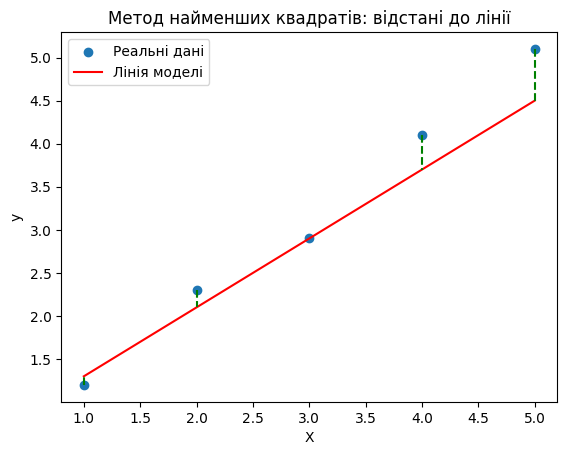

In [2]:
# 2.1 Приклад візуалізації MSE
import numpy as np
import matplotlib.pyplot as plt

# Реальні дані
X = np.array([1, 2, 3, 4, 5])
y = np.array([1.2, 2.3, 2.9, 4.1, 5.1])

# Припустимо, ми пробуємо лінію y = 0.8x + 0.5
y_pred = 0.8*X + 0.5

# Візуалізація
plt.scatter(X, y, label='Реальні дані')
plt.plot(X, y_pred, color='red', label='Лінія моделі')
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_pred[i]], 'g--')  # відстані (помилки)

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Метод найменших квадратів: відстані до лінії')
plt.show()


## 3. Експеримент: прогноз ціни квартир


w0 (intercept): -7.142857142857196
w1 (coef): 3.857142857142858


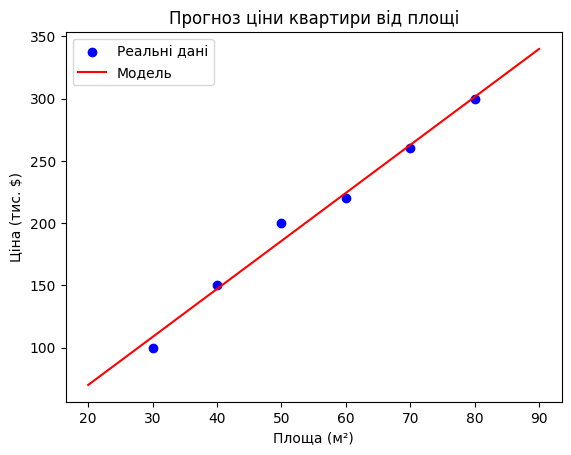

In [4]:
from sklearn.linear_model import LinearRegression

# Дані: площа (м²) та ціна (тис. $)
X = np.array([30, 40, 50, 60, 70, 80]).reshape(-1, 1)
y = np.array([100, 150, 200, 220, 260, 300])

# Створюємо модель
model = LinearRegression()
model.fit(X, y)

# Коефіцієнти
print("w0 (intercept):", model.intercept_)
print("w1 (coef):", model.coef_[0])

# Прогноз
X_new = np.linspace(20, 90, 100).reshape(-1, 1)
y_pred = model.predict(X_new)

# Візуалізація
plt.scatter(X, y, color='blue', label='Реальні дані')
plt.plot(X_new, y_pred, color='red', label='Модель')
plt.xlabel('Площа (м²)')
plt.ylabel('Ціна (тис. $)')
plt.legend()
plt.title('Прогноз ціни квартири від площі')
plt.show()


## 4. Передбачення нових значень
Тепер можна передбачити ціну квартири для будь-якої площі.


In [5]:
# Приклад передбачення
new_area = np.array([[55]])  # площа квартири = 55 м²
pred_price = model.predict(new_area)

print(f"Прогноз для квартири 55 м²: {pred_price[0]:.2f} тис. $")


Прогноз для квартири 55 м²: 205.00 тис. $


## 5. Висновки
- Лінійна регресія добре описує просту залежність між змінними.
- Модель знаходить оптимальну лінію, яка мінімізує середньоквадратичну помилку.
- Використовується у прогнозуванні цін, економіці, медицині та багатьох інших сферах.
